In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('CovidDataCleaned.csv')

In [4]:
#create county mapping.
dfZip = pd.read_csv('ZipToCounty.csv')

In [20]:
zips = dfZip['Zip'].values
counties = dfZip['County'].values

In [68]:
dfUnemp = pd.read_csv('NYCountyUnemployment.csv')

In [52]:
dfUnemp

,County,2019 Unemployment,2020 Unemployment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Brooklyn,3.5,12.1,NaN,NaN,NaN,NaN
1,New York,3.9,9.3,NaN,NaN,NaN,NaN
2,Queens,3.4,11.6,NaN,NaN,NaN,NaN
3,Bronx,5.8,16.0,NaN,NaN,NaN,NaN
4,Staten Island,3.8,9.8,NaN,NaN,NaN,NaN


In [11]:
print(list(set(list(county))))

['Staten Island', 'Brooklyn', 'New York', 'Queens', 'Bronx']


In [13]:
dfUnemp['County'][0] = 'Brooklyn'

<ipython-input-13-614b0bd9a44c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUnemp['County'][0] = 'Brooklyn'


In [65]:
dfUnemp

,County,2019 Unemployment,2020 Unemployment,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Brooklyn,3.5,12.1,NaN,NaN,NaN,NaN
1,New York,3.9,9.3,NaN,NaN,NaN,NaN
2,Queens,3.4,11.6,NaN,NaN,NaN,NaN
3,Bronx,5.8,16.0,NaN,NaN,NaN,NaN
4,Staten Island,3.8,9.8,NaN,NaN,NaN,NaN


In [16]:
#okay so now we just need to loop through everything and project it.

zipcodes = df['zcta'].values


[10280 10282 10301 10302 10303 10304 10305 10306 10307 10308 10309 10310
 10312 10314 11354 11355 11356 11357 11358 11360 11361 11362 11363 11364
 11365 11366 11367 11368 11369 11370 11372 11373 11374 11375 11377 11378
 11379 11385 11411 11412 11413 11414 11415 11416 11417 11418 11419 11420
 11421 11422 11423 11426 11427 11428 11429 11432 11433 11434 11435 11436
 10451 10452 10453 10454 10455 10456 10457 10458 10459 10460 10461 10462
 10463 10464 10465 10466 10467 10468 10469 10470 10471 10472 10473 10474
 10475 11004 10001 10002 10003 10004 10005 10006 10007 10009 10010 10011
 10012 10013 10014 10016 10017 10018 10019 10021 10022 10023 10024 10025
 10026 10027 10028 10029 10030 10031 10032 10033 10034 10035 10036 10037
 10038 10039 10040 10044 10065 10069 10075 11101 11102 11103 11104 11105
 11106 11109 10128 11691 11692 11693 11694 11697 11201 11203 11204 11205
 11206 11207 11208 11209 11210 11211 11212 11213 11214 11215 11216 11217
 11218 11219 11220 11221 11222 11223 11224 11225 11

In [60]:
countyVals = []

for z in zipcodes:
    try:
        county = counties[np.where(zips ==z)[0][0]]
        countyVals.append(county)
    except:
        county = 'New York'
        countyVals.append(county)
        
df['County'] = countyVals

    


In [69]:
oldUnemp = df['Unemployment Rate 2019'].values
newunemp = np.copy(oldUnemp)
i = 0

print(countyVals)


for c in countyVals:
    dfnew = dfUnemp[dfUnemp['County'] == c]
    if dfnew.shape[0] ==0:
        print(c)
        assert False
#     print(dfnew)
    oldval = dfnew['2019 Unemployment'].values[0]
    newval = dfnew['2020 Unemployment'].values[0]
    
    mult = newval/oldval
    newunemp[i]*=mult
    i+=1

    


    
    
    

['New York', 'New York', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Staten Island', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Queens', 'New York', 'New York', 'New York', 'New York', 'New York', 'New York', 'New

In [70]:
df['Unemployment 2020 (Projected)'] = newunemp

In [74]:
df.to_csv('NYZipDataWithUnemployment.csv',index = False)

In [73]:
# import matplotlib.pyplot as plt
print(np.sum(df['Unemployment 2020 (Projected)'].values)/df.shape[0])

10.412270281831942


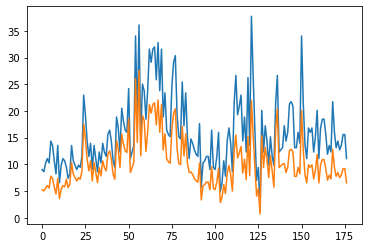

In [72]:
dfold = pd.read_csv('oldunemp.csv')
plt.plot(dfold['Unemployment 2020 (Projected)'].values)
plt.plot(df['Unemployment 2020 (Projected)'].values)